# 1. Business Understanding

In [ ]:
# Tujuan: Mengklasifikasikan jenis bunga iris berdasarkan karakteristik (panjang/panjang kelopak dan sepal).

# 2. Data Understanding

In [1]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
# Memuat dataset iris
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)


In [3]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Menampilkan informasi dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [5]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())



Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


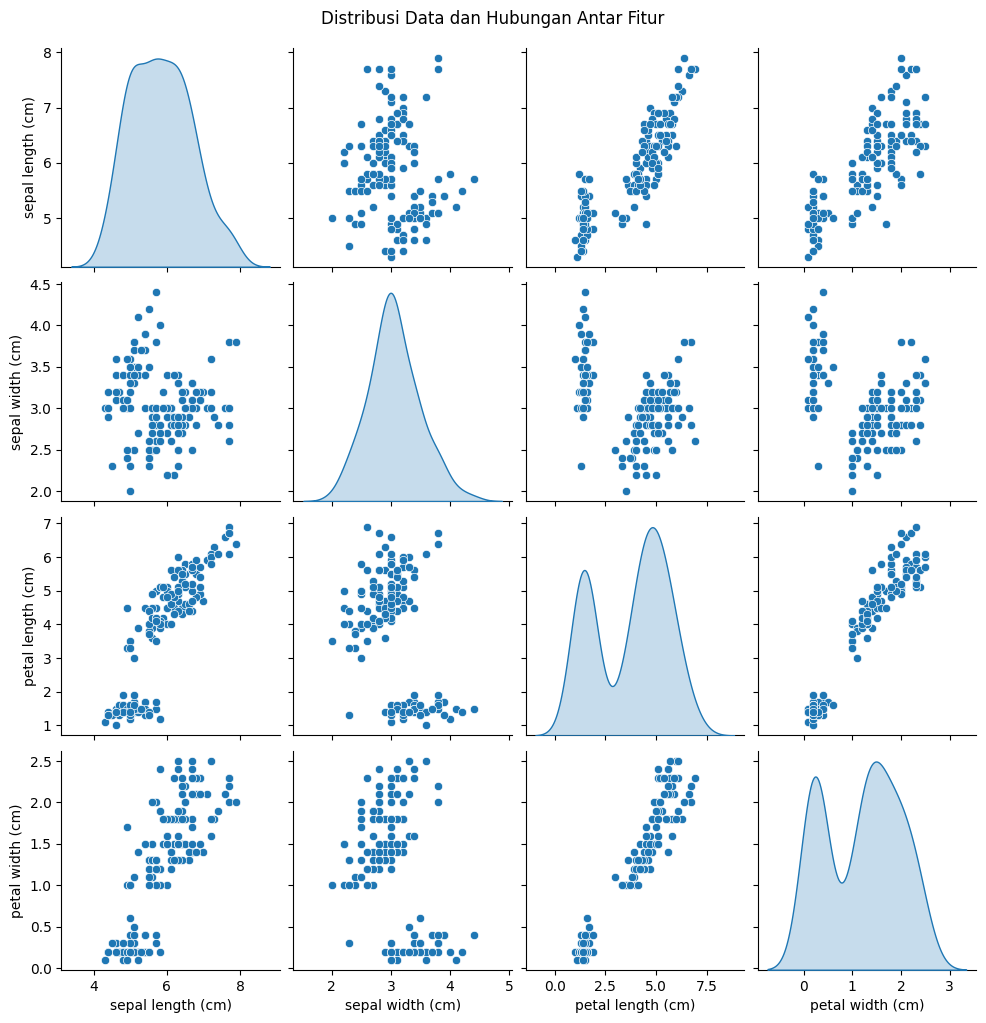

In [6]:
# Distribusi data
sns.pairplot(data, diag_kind='kde')
plt.suptitle("Distribusi Data dan Hubungan Antar Fitur", y=1.02)
plt.show()

In [7]:
# Korelasi antar fitur
print("\nKorelasi Antar Fitur:")
print(data.corr())


Korelasi Antar Fitur:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


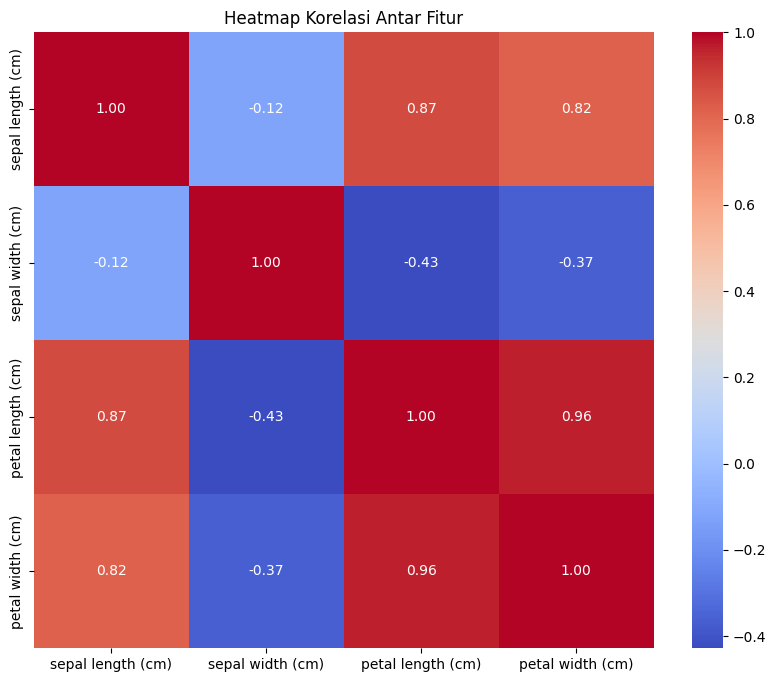

In [8]:
# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# 3. Data Preparation

In [9]:
# 1. Cek Missing Values
print("\nCek Missing Values:")
print(data.isnull().sum())



Cek Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


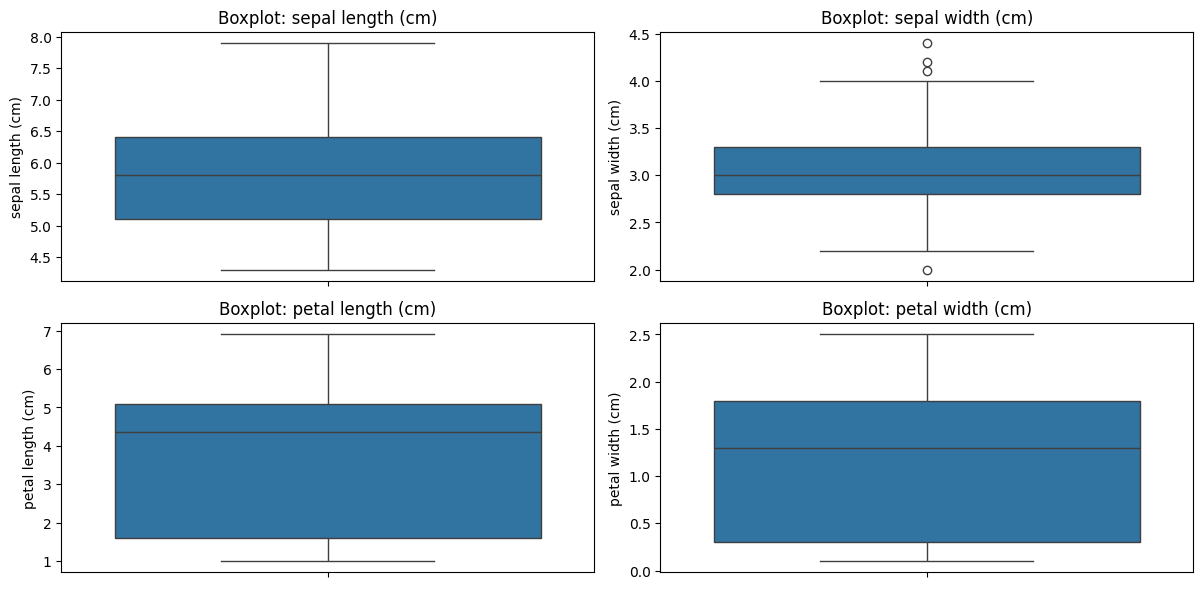

In [10]:
# 2. Deteksi Outlier (Menggunakan Boxplot)
plt.figure(figsize=(12, 6))
for i, col in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()


In [11]:
# 3. Normalisasi Data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[iris.feature_names]), columns=iris.feature_names)

# Menampilkan data setelah normalisasi
print("\nData Setelah Normalisasi (5 Baris Pertama):")
print(data_scaled.head())



Data Setelah Normalisasi (5 Baris Pertama):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


# 4. Modelling

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)


# 5. Evaluation

In [14]:
# Evaluasi performa model
dbi = davies_bouldin_score(data_scaled, clusters)
print(f"\nDavies–Bouldin Index: {dbi:.2f}")




Davies–Bouldin Index: 0.79


# 6. Deployment

In [ ]:
# Visualisasi hasil clustering
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Visualisasi Clustering (K-Means)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.colorbar(label='Cluster')
plt.show()
